In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing Dataframe
df = pd.read_csv('./datasets/notes_data/notes.csv', header = None) 
# Initializing column names/ headings
cols = ['Image.var','Image.skew','Image.curt','Entropy','Class'] #Variance, skew, curtoris
df.columns = cols
# Creating a copy of dataframe 
dfcpy = df

In [3]:
## Exploratory Data Analysis
# Exploring header 
df.head(2)

,Image.var,Image.skew,Image.curt,Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0


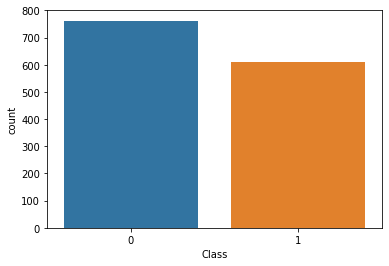

In [4]:
sns.countplot(x='Class', data=df)

/home/raxit/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/home/raxit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/raxit/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


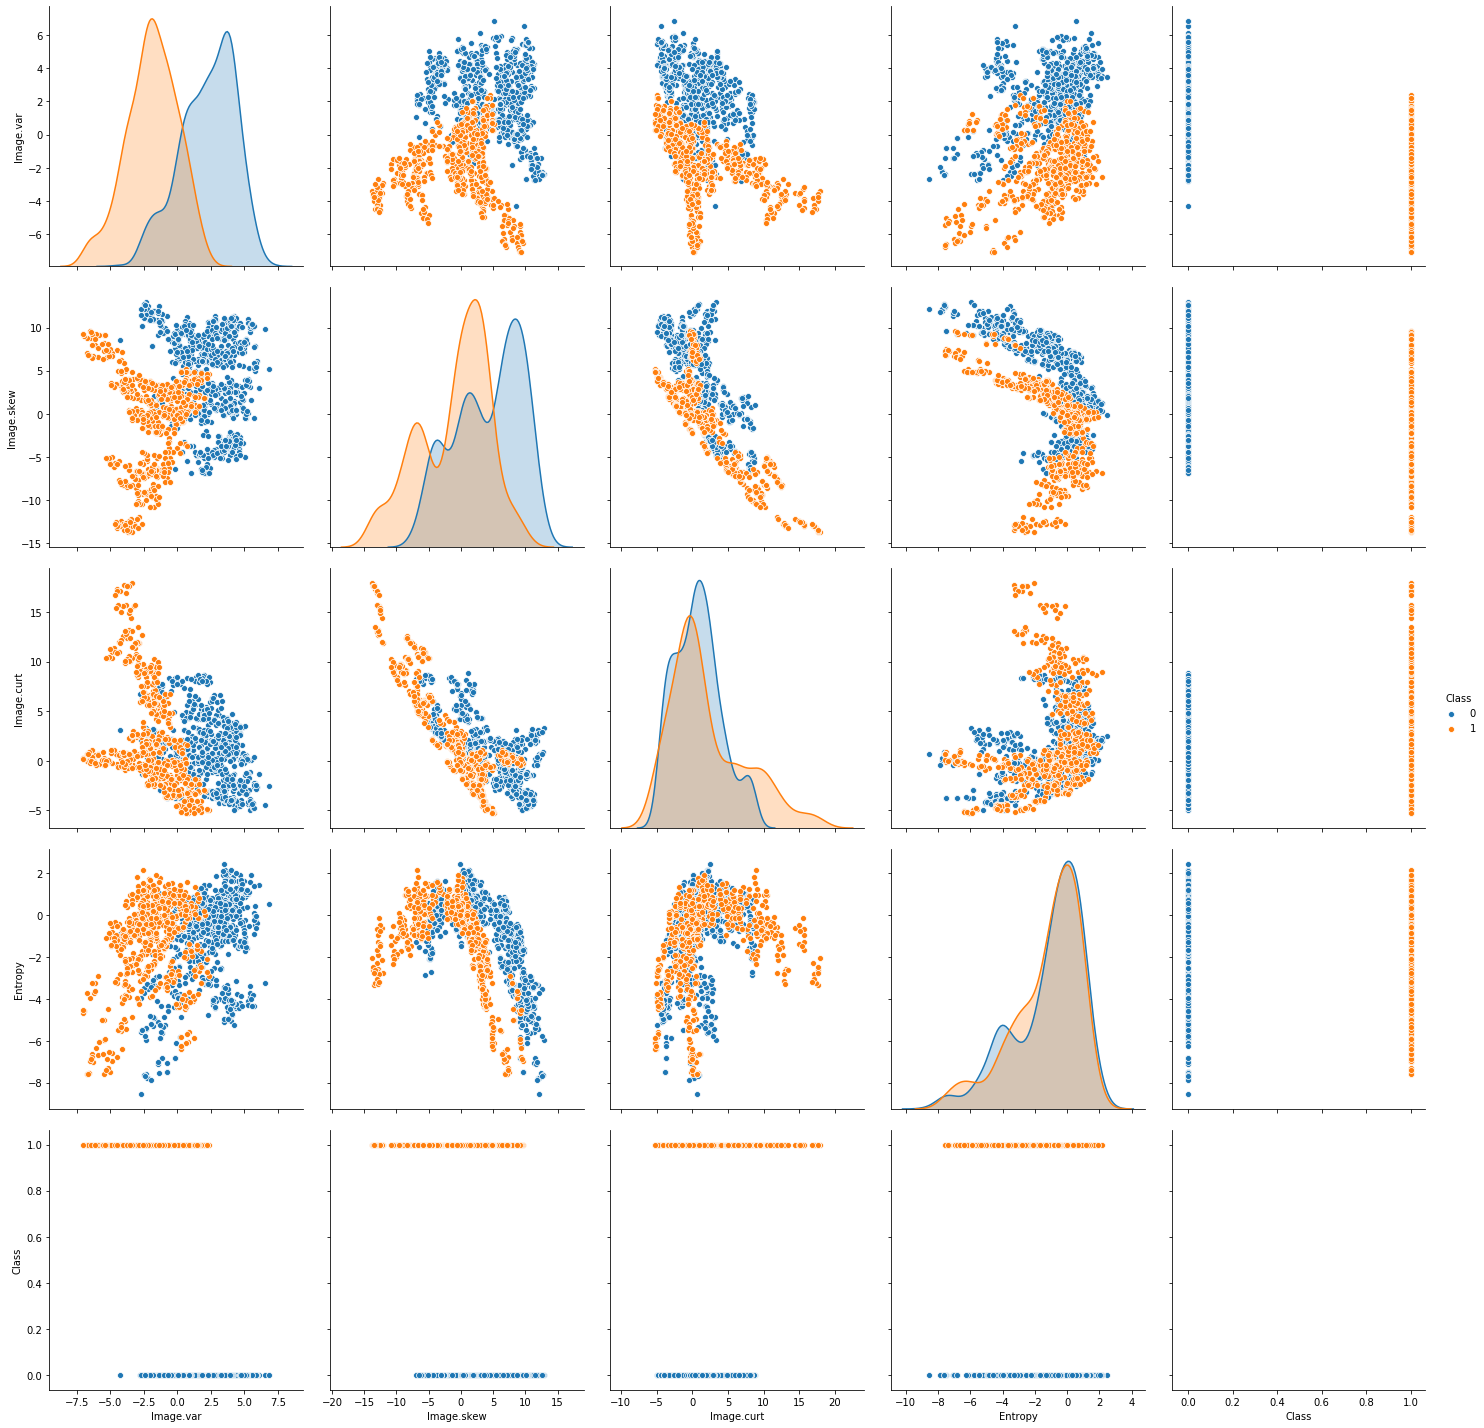

In [5]:
sns.pairplot(df, hue='Class', size=4)

In [6]:
df.isnull().sum()

Image.var     0
Image.skew    0
Image.curt    0
Entropy       0
Class         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Image.var     1372 non-null float64
Image.skew    1372 non-null float64
Image.curt    1372 non-null float64
Entropy       1372 non-null float64
Class         1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


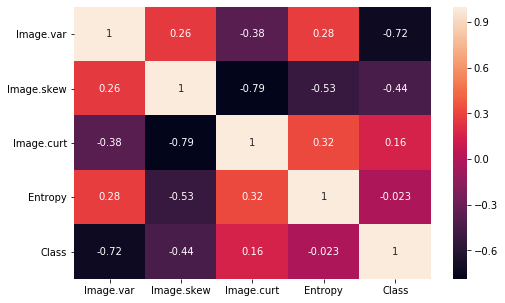

In [8]:
plt.figure(figsize = (8,5))
sns.heatmap(df.corr(), annot=True)

In [9]:
# Defining the axes
X = df.drop('Class', axis=1) #axis=1 removes all rows
Y = df['Class']

In [10]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2)

In [11]:
# Predictive modelling - SVC
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')

In [12]:
# Training the model svm
svm.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [13]:
# Making predictions - testing the model
Y_pred = svm.predict(X_test)

In [14]:
## Accuracy REPORT
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Accuracy Score
print(accuracy_score(Y_test, Y_pred))
# Classification Report
print(classification_report(Y_test, Y_pred))
# Confusion Matrix
print(confusion_matrix(Y_test, Y_pred))

0.9890909090909091
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       149
           1       0.98      0.99      0.99       126

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

[[147   2]
 [  1 125]]


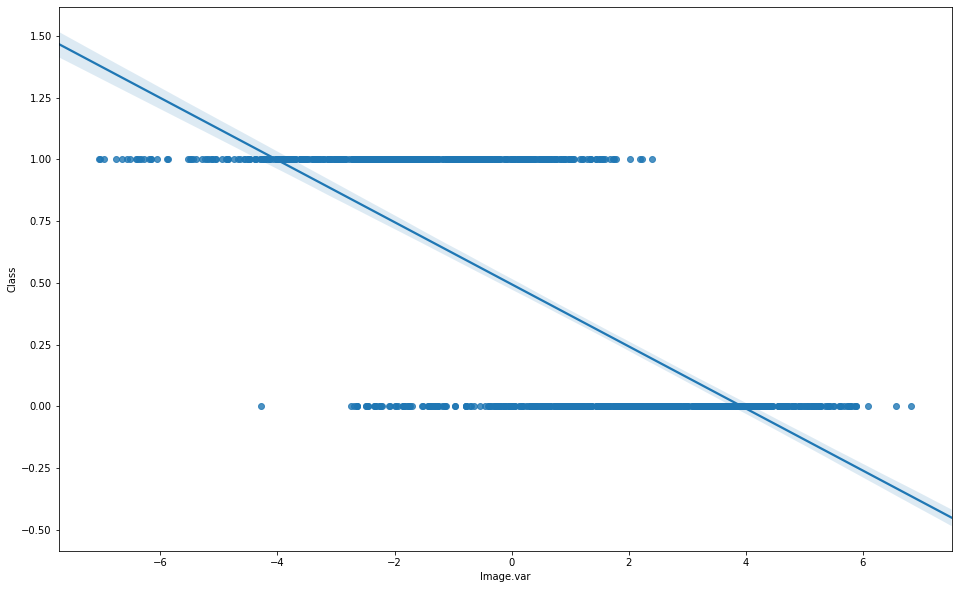

In [15]:
plt.figure(figsize = (16,10));
sns.regplot(X_train['Image.var'],Y_train);
plt.xlabel('Image.var')
plt.ylabel('Class')
plt.show;

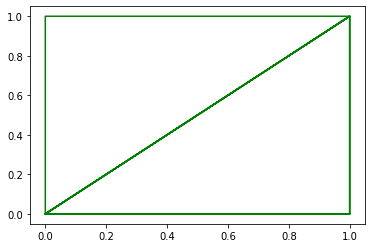

In [16]:
# Sigmoid plot
plt.plot(Y_pred, Y_test, 'g-', label = 'Training Data')

In [17]:
plt.plot(X_test, Y_test[:,0], 'r--', label = 'Testing Data')

ValueError: Can only tuple-index with a MultiIndex